# Домашнее задание №3: Архитектуры GAN

**[0 баллов] Считайте изображение и получите две вариации изображения: HR, LR.**

In [2]:
# скачаем изображение
!wget -O hr.png https://github.com/aiedu-courses/super_resolution/blob/main/data/hr.png?raw=true

--2024-05-09 19:16:47--  https://github.com/aiedu-courses/super_resolution/blob/main/data/hr.png?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/aiedu-courses/super_resolution/raw/main/data/hr.png [following]
--2024-05-09 19:16:47--  https://github.com/aiedu-courses/super_resolution/raw/main/data/hr.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aiedu-courses/super_resolution/main/data/hr.png [following]
--2024-05-09 19:16:48--  https://raw.githubusercontent.com/aiedu-courses/super_resolution/main/data/hr.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HT

In [40]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torch import nn
import torch

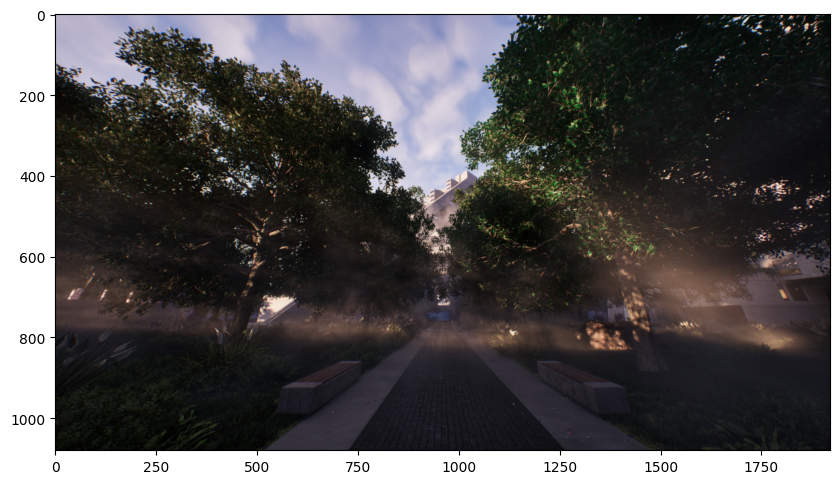

In [17]:
# считаем изображение при помощи библиотеки pillow и приведем к RGB формату
hr_img = Image.open("hr.png").convert("RGB")
_ = plt.figure(figsize=(10, 7))
_ = plt.imshow(hr_img)

In [18]:
# случайным образом получим HR изображение размера (256, 256)
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.RandomCrop((256, 256))
    ]
)

# получим LR изображение размера (64, 64) при помощи простого resize
resize_transform = transforms.Resize((64, 64))

# tensor to PIL
tensor2pil = transforms.ToPILImage()

In [19]:
hr_img = transform(hr_img)
lr_img = resize_transform(hr_img)

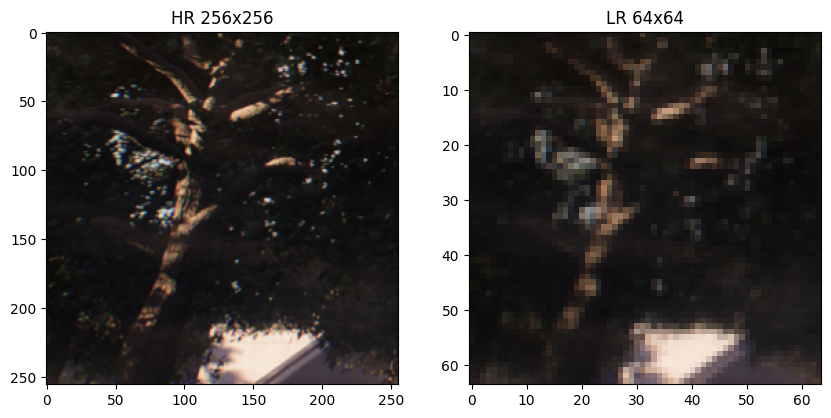

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))

ax[0].imshow(tensor2pil(hr_img))
ax[0].set_title("HR 256x256")

ax[1].imshow(tensor2pil(lr_img))
ax[1].set_title("LR 64x64")

plt.show()

In [21]:
hr_img = hr_img.unsqueeze(0)
lr_img = lr_img.unsqueeze(0)

### **[0 баллов] Подсчет параметров модели**

In [11]:
# возьмите реализацию функции из ДЗ №2: Архитектуры CNN
def calculate_total_parameters(model: nn.Module) -> int:
    """
        Parameters
        ----------
        model: nn.Module
            Объект PyTorch модели.

        Returns
        -------
        int
            Число всех параметров модели.
    """
    ...

### **[8 баллов]** SRGAN: генератор

In [14]:
# реализуйте объявленные методы класса
class ResBlock(nn.Module):
    def __init__(self) -> None:
        """
            Residual блок: Conv -> BN -> PReLU -> Conv -> BN -> F(x) + x.

            Returns
            -------
            None
        """
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [25]:
# реализуйте объявленные методы класса
class SRGAN_Up(nn.Module):
    def __init__(self, factor: int) -> None:
        """
            Parameters
            ----------
            factor: int
                Коэффициент увеличения [2|3|4].

            Returns
            -------
            None
        """
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [26]:
# реализуйте объявленные методы класса
class SRGAN_G(nn.Module):
    def __init__(self, nchannels: int = 3, nblocks: int = 16, scale: int = 4) -> None:
        """
            Parameters
            ----------
            nchannels: int
                Количество каналов входного изображения.
            nblocks: int
                Количество ResBlock блоков.
            scale: int
                Коэффициент увеличения [2|3|4].

            Returns
            -------
            None
        """
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [ ]:
# создадим SRGAN генератор и напечатаем его архитектуру
srgan_g = ...
srgan_g

In [ ]:
# посчитаем количество параметров модели
print(f"SRGAN generator parameters = {...}")

In [30]:
# проверка на корректность размерностей
assert srgan_g(lr_img).shape == (1, 3, 256, 256)

### **[8 баллов]** ESRGAN: генератор

In [42]:
# реализуйте объявленные методы класса
class DenseBlock(nn.Module):
    def __init__(self, nf: int = 64, gc: int = 32, residual_scaling: float = 0.2) -> None:
        """
            Parameters
            ----------
            nf: int
                Количество входных и выходных каналов блока.
            gc: int
                Количество скрытых каналов блока.
            residual_scaling: float
                Коэффициент умножения выходов блока перед сложением с предыдущим слоем.

            Returns
            -------
            None
        """
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [43]:
# реализуйте объявленные методы класса
class RRDB(nn.Module):
    def __init__(self, nf: int = 64, gc: int = 32, residual_scaling: float = 0.2) -> None:
        """
            Parameters
            ----------
            nf: int
                Количество входных и выходных каналов блока.
            gc: int
                Количество скрытых каналов блока.
            residual_scaling: float
                Коэффициент умножения выходов блока перед сложением с предыдущим слоем.

            Returns
            -------
            None
        """
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [57]:
# реализуйте объявленные методы класса
class ESRGAN_Up(nn.Module):
    def __init__(self, factor: int, mode: str = "nearest") -> None:
        """
            Parameters
            ----------
            factor: int
                Коэффициент увеличения [2|3|4].
            mode: str
                Тип интерполяции [bicubic|bilinear|nearest].

            Returns
            -------
            None
        """
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [58]:
# реализуйте объявленные методы класса
class ESRGAN_G(nn.Module):
    def __init__(
            self,
            nchannels: int = 3,
            nblocks: int = 16,
            nf: int = 64,
            gc: int = 32,
            scale: int = 4,
            residual_scaling: float = 0.2,
            interpolation_mode: str = "nearest",
        ) -> None:
        """
            Parameters
            ----------
            nchannels: int
                Количество каналов входного изображения.
            nblocks: int
                Количество RRDB блоков.
            nf: int
                Количество входных и выходных каналов для RRDB блоков.
            gc: int
                Количество скрытых каналов для RRDB блоков.
            scale: int
                Коэффициент увеличения [2|3|4].
            residual_scaling: float
                Коэффициент умножения выходов блока перед сложением с предыдущим слоем.
            interpolation_mode: str
                Тип интерполяции для upsample блоков [bicubic|bilinear|nearest].

            Returns
            -------
            None
        """
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [ ]:
# создадим ESRGAN генератор и напечатаем его архитектуру
esrgan_g = ...
esrgan_g

In [ ]:
# посчитаем количество параметров модели
print(f"ESRGAN generator parameters = {...}")

In [61]:
# проверка на корректность размерностей
assert esrgan_g(lr_img).shape == (1, 3, 256, 256)

### **[8 баллов]** Дискриминатор

In [32]:
# реализуйте объявленные методы класса
class DiscriminatorBlock(nn.Module):
    def __init__(self, inf: int, outf: int, stride: int, use_bn: bool = True) -> None:
        """
            Блок дискриминатора SRGAN: Conv -> BN -> LeakyReLU.

            Parameters
            ----------
            inf: int
                Количество каналов входного изображения.
            outf: int
                Количество каналов выходного изображения.
            stride: int
                Шаг свертки [1|2].
            use_bn: bool
                Флаг использования слоя BN.

            Returns
            -------
            None
        """
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [35]:
# реализуйте объявленные методы класса
class Discriminator(nn.Module):
    def __init__(self, nchannels: int = 3, nblocks: int = 8, use_sigmoid: bool = False) -> None:
        """
            Parameters
            ----------
            nchannels: int
                Количество каналов входного изображения.
            nblocks: int
                Количество DiscriminatorBlock блоков.
            use_sigmoid: bool
                Флаг использования сигмоидальной функции активации после последнего слоя.

            Returns
            -------
            None
        """
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [ ]:
# создадим дискриминатор и напечатаем его архитектуру
discriminator = ...
discriminator

In [ ]:
# посчитаем количество параметров модели
print(f"Discriminator parameters = {...}")

In [39]:
# проверка на корректность размерностей
assert discriminator(srgan_g(lr_img)).shape == (1, 1)
assert discriminator(srgan_g(lr_img)).shape == discriminator(hr_img).shape
assert discriminator(esrgan_g(lr_img)).shape == (1, 1)
assert discriminator(esrgan_g(lr_img)).shape == discriminator(hr_img).shape

### **[1 балл] Feedback**

Напишите ваши эмоции от этого домашнего задания, было ли оно интересным, оцените сложность, затраты по времени и т.п., все что пожелаете :)